# Analysis of Bogotá's household data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

## Catastro

In [2]:
# df_catastro = pd.read_csv('Info_catastro.csv', low_memory = False)
df_predios = pd.read_table('predios.txt', on_bad_lines='warn', delimiter=';')

C:\Users\mdomi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_predios

,OBJECTID,PreCBarrio,PreNBarrio,PreCManz,PreCPredio,PreCCons,PreCResto,PreChip,PreCedCata,PreNupre,...,PreBMobili,PreBCons,PreCTamano,PreCEnchap,PreCMobili,PreCConse,PreCIndus,PreACercha,PreClCons,Barmanpre
0,1,4405,OSPINA PEREZ SUR,47,9,0,0,AAA0039RSOM,004405470900000000,110010144160500470009000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,4405047009
1,2,4405,OSPINA PEREZ SUR,48,1,0,0,AAA0039RSPA,43S 46 40,110010144160500480001000000000,...,332.0,341.0,412.0,424.0,432.0,441.0,NaN,NaN,R,4405048001
2,3,4405,OSPINA PEREZ SUR,48,1,0,0,AAA0039RSPA,43S 46 40,110010144160500480001000000000,...,332.0,341.0,412.0,424.0,432.0,441.0,NaN,NaN,R,4405048001
3,4,4405,OSPINA PEREZ SUR,48,1,0,0,AAA0039RSPA,43S 46 40,110010144160500480001000000000,...,332.0,341.0,412.0,424.0,432.0,441.0,NaN,NaN,R,4405048001
4,5,4405,OSPINA PEREZ SUR,48,1,0,0,AAA0039RSPA,43S 46 40,110010144160500480001000000000,...,332.0,341.0,412.0,424.0,432.0,441.0,NaN,NaN,R,4405048001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531714,3531715,8503,SANTA TERESA,2,26,1,7012,AAA0158WCPP,008503022600107012,110010185010300020026901070012,...,332.0,342.0,412.0,424.0,432.0,442.0,NaN,NaN,R,8503002026
3531715,3531716,8503,SANTA TERESA,2,26,1,8001,AAA0158WCRU,008503022600108001,110010185010300020026901080001,...,332.0,342.0,412.0,424.0,432.0,442.0,NaN,NaN,R,8503002026
3531716,3531717,8503,SANTA TERESA,2,26,1,8002,AAA0158WCSK,008503022600108002,110010185010300020026901080002,...,332.0,342.0,412.0,424.0,432.0,442.0,NaN,NaN,R,8503002026
3531717,3531718,8503,SANTA TERESA,1,5,8,2004,AAA0108FLZE,168 27 9 297,110010185010300010005908020004,...,332.0,342.0,412.0,423.0,433.0,442.0,NaN,NaN,R,8503001005


35.01668179340333

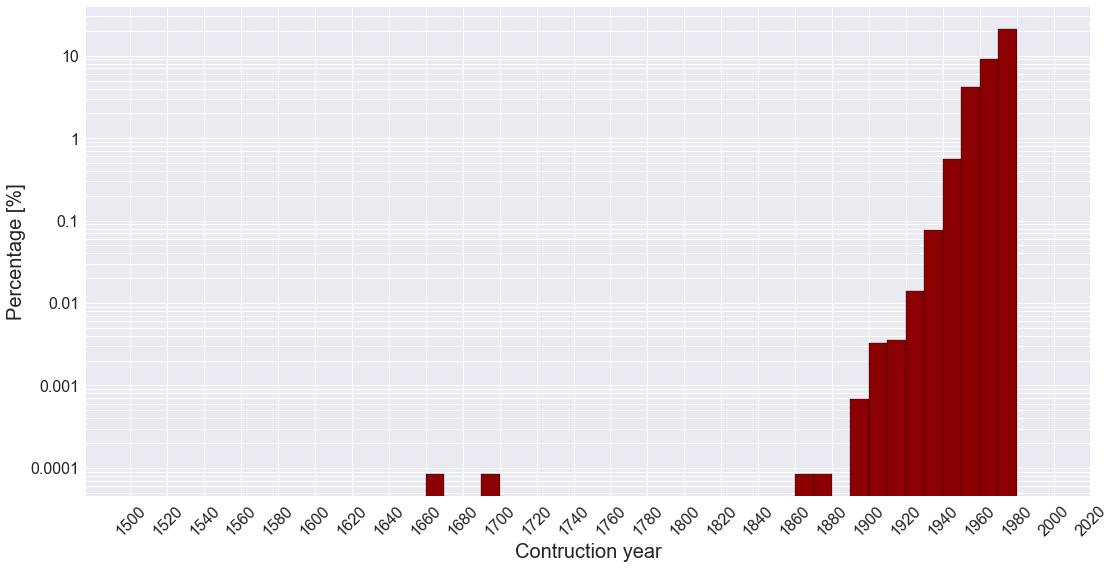

In [6]:
data = df_predios[(df_predios.PreVetustz > 1500)&(df_predios['PreCUso'] == 1)]['PreVetustz']
bins = np.arange(1500,1981,10)
we = np.ones(len(data))/(len(data)+1)


fig = plt.figure(figsize = (18,9))
F = plt.hist(data, bins = bins, weights = we, edgecolor = 'k', zorder = 5, color = 'darkred')
plt.yscale('log')
plt.grid(True, which = 'both', zorder = -5)
ax = plt.gca()

plt.yticks([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])
plt.xticks(np.arange(1500,2021, 20))
ax.set_yticklabels([0.0001, 0.001, 0.01, 0.1, 1, 10], fontsize = 16)
ax.set_xticklabels(np.arange(1500,2021, 20), rotation = 45, fontsize = 16)
plt.ylabel('Percentage [%]', fontsize = 20)
plt.xlabel('Contruction year', fontsize = 20)

# fig.savefig('Houses_Age_Bogota.png')
np.sum(F[0])*100

In [ ]:
df_catastro['Codigo'] = df_catastro['CONCODIGO'].apply(lambda df: df[:12])
df_predios['Codigo'] = df_predios.apply(lambda df:  f'{df.PreCBarrio:06}' + f'{df.PreCManz:03}' + f'{df.PreCPredio:03}', axis =1)
df_predios = df_predios[(df_predios['PreVetustz']>1800)&(df_predios['PreCUso'] == 1)].iloc[:,[21, -1]]
df_predios['AGE_RANK'] = df_predios['PreVetustz'].apply(lambda df: 1 if (2022 - df)<10
                                                        else 2 if ((2022-df)<20) & ((2022-df)>10) 
                                                        else 3 if ((2022-df)<30) & ((2022-df)>20) 
                                                        else 4 if ((2022-df)<40) & ((2022-df)>30) 
                                                        else 5 if ((2022-df)<50) & ((2022-df)>40)
                                                        else 6 if ((2022-df)<60) & ((2022-df)>50)
                                                        else 7 if ((2022-df)<70) & ((2022-df)>60)
                                                        else 8 if ((2022-df)<80) & ((2022-df)>70)
                                                        else 9
                                                       )
df_predios = df_predios.iloc[:,-2:]
df_catastro = df_catastro.set_index('Codigo').iloc[:,[2, 4]]

In [ ]:
houses = df_predios.merge(df_catastro, left_on = 'Codigo', right_on = 'Codigo')
houses = houses.groupby('Codigo').max().reset_index()
houses['BASEMENT'] = houses.apply(lambda df : 1 if df.CONNSOTANO > 0 else 0, axis = 1)
houses['COD'] = houses.Codigo.apply(lambda df : 'A' + df)
houses = houses.iloc[:,[5,4,1]]
houses

In [ ]:
plt.hist(houses.AGE_RANK, )

In [5]:
houses.to_csv('construction_vars_houses_Bogotá.csv')